In [1]:
import numpy as np
from scipy import stats
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("/home/ebrahim/brainaudio/figure_data/")

from utils import one_sample_t_test, paired_t_test

--- Paired T-Test Results ---
Mean A: 9.3732
Mean B: 9.7105
Mean difference (A - B): -0.3373
T-statistic:    -4.58548
P-value:        0.00132

Conclusion: The difference is statistically significant (Reject H0).
A is significantly better than B.


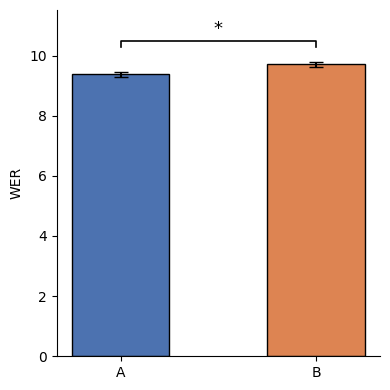

(np.float64(-4.585478527375399), np.float64(0.001317488396748739))

In [7]:
baseline_results = np.load("saved_data/baseline_5_gram_results.npy")
main_results = np.load("saved_data/main_results.npy")
paired_t_test(main_results, baseline_results)

In [5]:
baseline_results

array([9.23 , 9.04 , 9.095, 9.825, 9.338, 9.446, 9.257, 9.379, 9.947,
       9.825])

### Abalation #1: Calling LLM only once at the end of decoding

In [6]:
main_results

array([9.23 , 9.04 , 9.095, 9.825, 9.338, 9.446, 9.257, 9.379, 9.717,
       9.405])

In [ ]:
no_delayed_fusion_variants = np.load("/home/lionelhu/brainaudio/figure_data/b2t_24_results/saved_data/no_delayed_fesion_ablation.npy")*100
t, p = paired_t_test(no_delayed_fusion_variants, val_scores) 

### Abalation #2: No LLM Fine-tuning

In [ ]:
no_finetuning_variants = np.load("/home/lionelhu/brainaudio/figure_data/b2t_24_results/saved_data/no_finetuning_ablation.npy")*100
t, p = paired_t_test(no_finetuning_variants, val_scores) 

### Abalation #3: No LLM Fine-tuning

In [ ]:
no_phoneme_variants = np.load("/home/lionelhu/brainaudio/figure_data/b2t_24_results/saved_data/no_variants_ablation.npy")*100
t, p =paired_t_test(no_phoneme_variants, val_scores)
